
# ESB Practical: the 1D Earth

In [9]:
## Importing libraries
%matplotlib notebook
import numpy as np                        # library to deal with arrays
import matplotlib.pyplot as plt           # library for general plotting
import scipy.integrate as integrate

### 1. Mass and Moment of Inertia


In this first exercise we are going to fit the mass and moment of inertia of the Earth for a two-layer case (i.e. with one value for the density of the core and one for the density of the mantle). In the code below a start is given for two functions that calculate the mass and moment of inertia for this simple Earth, but the equations themselves still need to be implemented.  

The mass is given by:
$ M = \frac{4}{3} \pi [R^3 \rho_{m} +  r_{c}^3 (\rho_{c}-\rho_{m})] $

The Moment of Intertia is given by: 
$I  = \frac{8}{15} \pi [(R^5\rho_{m} + r_{c}^5 (\rho_{c}-\rho_{m})] $

Where $R$ is the radius of the Earth (6371 km), $r_c$ is the radius of the core (3481 km), $\rho_c$ is the density of the core, and $\rho_m$ is the density of the mantle. 

*a.* Show the above equation for the mass results from $ M = \int \rho dV $ when assuming a two-layered sphere with constant densities. 

<font color = 'blue'>$M = M_c+M_m = \frac{4}{3} \pi r_{core}^3 \rho_{core} +  \frac{4}{3} \pi [r_{mantle}^3 -r_{core}^3]\rho_{mantle} = \frac{4}{3} \pi [r_{earth}^3 \rho_{mantle} +  r_{core}^3 (\rho_{core}-\rho_{mantle})]$</font>


*Bonus take-home question: Derive the equation for the Moment of Inertia of a two-layered sphere.* <font color = 'blue'>*See bottom of the page.*</font>

*b.* Add the equations to the two functions started below. If you have done this correctly the error messages will dissapear. 

<font color = 'blue'>*See code block below.*</font>

Note:
- The numpy library offers the value of pi - use np.pi (remember to import the libraries at the top!)
- To take a power of a number in python you use **, e.g. $x^y = x**y$
- Python cares about indentation. The equation within the function needs to be indented. 



In [10]:
def mass_of_Earth(dens_mantle, dens_core, rad_core = 3481.e3, rad_earth =6371.e3):
    """
    implement mass of Earth here, using the four variables 
    'dens_mantle, dens_core, rad_core, rad_earth'
    """
    mass  = 4./3. * np.pi * ((rad_earth**3 * dens_mantle) + rad_core**3*(dens_core-dens_mantle))
    return mass

assert(mass_of_Earth(5.5e3, 5.5e3)==5.957638042651645e+24 )

def MoI_of_Earth(dens_mantle, dens_core, rad_core = 3481.e3, rad_earth =6371.e3):
    """
    implement moment of intertia of Earth here, using the four variables 
    'dens_mantle, dens_core, rad_core, rad_earth'
    """
    MoI  = 8./15. * np.pi * ((rad_earth**5 * dens_mantle) + rad_core**5*(dens_core-dens_mantle))
    return MoI

assert(MoI_of_Earth(5.5e3, 5.5e3)==9.672735574366918e+37 )

Now we can use these functions to fit the mass and moment of inertia. We are taking the radii of the Earth (6371 km) and the core (3481 km) as a given.  We divide the moment of intertia by the mass and the radius squared to obtain the dimensionless moment of inertia factor. 

*c.* Change the density values for the core and the mantle below to fit the mass and moment of intertia at the same time. What values do you find?

<font color = 'blue'>*Values should be close to $4.1 \times 10^{3}\ kg m^{-3}$ for the mantle and $12.8 \times 10^{3}\ kg m^{-3}$ for the core.*</font>

*d.* Show that the mean density of a two-layered planet is given by: 

$ \bar{\rho} = \left(\frac{r_c}{R}\right)^3 (\rho_c - \rho_m) + \rho_m $

And compute the mean value for the two-layered Earth constrained in *c.*

<font color = 'blue'>$ \bar{\rho} = \frac{M}{V}= \frac{4/3 \pi [R^3 \rho_{m} +  r_{c}^3 (\rho_{c}-\rho_{m})]}{ 4/3 \pi R^3} = \left(\frac{r_c}{R}\right)^3 (\rho_c - \rho_m) + \rho_m  = \left(\frac{3481\times 10^{3}}{6371\times 10^{3}}\right)^3(12.8\times 10^{3}-4.1 \times 10^{3}) + 4.1 \times 10^{3} = 5.5 \times 10^{3} kg m^{-3} $</font>


In [3]:
observed_mass = 5.97e24 #kg
observed_MoI = 0.33 #factor MoI/mass

density_mantle = 4.1e3 #kg/m^3
density_core = 12.75e3 #kg/m^3

computed_mass = mass_of_Earth(density_mantle, density_core)

computed_MoI = MoI_of_Earth(density_mantle, density_core)/(computed_mass*6371.e3**2)


print('Observed mass = ', observed_mass,'kg. Computed mass = ', '{:.3e}'.format(computed_mass) , 'kg.')
print('Observed MoI factor = ', observed_MoI,'. Computed MoI factor = ', np.round(computed_MoI,2), '.')

Observed mass =  5.97e+24 kg. Computed mass =  5.969e+24 kg.
Observed MoI factor =  0.33 . Computed MoI factor =  0.33 .


### 2. Pressure and gravity inside the Earth

Next we are going to compute the pressure and gravity profiles in the Earth. Lets first read in the full 1D density profile and plot this. You do not have to change anything in this script. 

*a.* Compare the densities shown here with the average values found for the mantle and core in the last exercise.

<font color = 'blue'>*They are comparable. In the two-layer case the density of the mantle is on the low-end of the range observed here, and the density of the core on the high-end, to fit the Moment of Inertia.*</font>

*b.* Zoom in on the most shallow layer in this model. How thick is it and what density does it have? What do you think it represents? 

<font color = 'blue'>*The top layer is several kilometres and has a density of 1000 $kgm^{-3}$. This must represent an ocean. Of course, a 1D model one has to choose to represent either oceanic or continental lithosphere. Oceanic lithosphere is slightly more representative as it covers 60 \% of the globe.*</font>

*c.* What parts of this model do you think are constrained by the Adams-Williamson equation?

<font color = 'blue'>*Parts of the model that are in between discontinuities, particularly in the lower mantle, outer core, and inner core show a steady increase in density.*</font>

*d.* Identify three phase transitions that occur. Compute the density jumps at these transitions in \%.

<font color = 'blue'>*Phase transitions occur at the 410 and 660 km depth (in this model at 670 km depth) and at the inner-core boundary. Note that the CMB boundary is not a phase transition, but a compositional change.*</font>

<font color = 'blue'>*410 density jump is $\sim 5.2 \%$*</font>

<font color = 'blue'>*660 density jump is $\sim 9.8 \%$*</font>

<font color = 'blue'>*ICB density jump is $\sim 5.0 \%$*</font>



In [8]:
# read in density
rad = [] # initialise list for radius
dens = [] # initialise list for density
# open file
with open('https://raw.githubusercontent.com/sannecottaar/ESC_1B_ESB/main/1D%20Earth/PREMQL6.webarchive', 'r') as file:
    #loop through lines in file
    for line in file.readlines():
        # split values in line
        val = line.split()
        # add first value to radius list as a float
        rad.append(float(val[0]))
        # add second value to density list as a float
        dens.append(float(val[1]))
# change lists into arrays
rad = np.array(rad)
dens = np.array(dens)



# plot arrays
plt.plot(rad/1.e3,dens)
plt.xlabel('radius ($km$)')
plt.ylabel('density ($kg/m^3$)')

FileNotFoundError: ignored

To obtain the pressure inside the Earth, we first need to obtain the gravitational accelaration as a function of depth. We know the gravity at the centre of the Earth is zero, so we start integrating from there. We also know the gravity at the surface is 9.81, which our integration should end up at!

$g(r) = \frac{GM(r)}{r^2} = \frac{G\int_0^r\rho(r)dV}{r^2} = \frac{4\pi G\int_0^r\rho(r)r^2 dr}{r^2}$

Where 
- $G = 6.67408\times 10^{-11}  m^3kg^{-1}s^{-2}$
- $M(r)$ = the mass in the sphere up to radius $r$
 
*e.* Confirm the units of this equation match that of acceleration. 

<font color = 'blue'>$[g]= m^3kg^{-1}s^{-2} \cdot kg \cdot m^{-2} = ms^{-2}$</font>

*f.* Implement the equation for the gravitational accelareration in the code below. To implement an integral follow:
- $Y(x)= \int_0^xydx$ = integrate.cumtrapz(y,x,initial=0.)

<font color = 'blue'>*See code block below.*</font>

*g.* Why is the gravitational acceleration almost constant across the mantle (and even slightly increasing towards the core-mantle boundary)? 

<font color = 'blue'>*The decrease of mass of the sphere beneath a point in the mantle is (more than) counterbalanced by the smaller distance to the centre of the mass. You can see the equation is a gives a balance between the decrease in $M(r)$ in the numerator and $r^2$ in the denominator.*</font>

In [5]:
grav = 6.67408e-11 #m^3kg^-1s^-2


#### Implement integration here
g = grav*4.*np.pi*integrate.cumtrapz(dens*rad*rad, rad, initial = 0.)/rad**2

# Assert the integration gives the correct value at the surface
print('g at the surface is ', np.round(g[-1],2), '$m/s^2$')
assert(np.round(g[-1],2)==9.82)

# If you divided g by r^2, there will be a division by zero at the centre. Python will return a 'nan' or 'not-a-number'
# in this case. Here we overwrite the value here back to zero
g[0]=0


# Plot g as a function of radius
plt.figure()   
plt.plot(rad/1.e3,g)
plt.xlabel('radius ($km$)')
plt.ylabel('gravity ($m/s^2$)')
plt.xlim(0, 6371)

TypeError: ignored

Now, to obtain the pressure inside the Earth, we now want to integrate the gravitational accelerations and densities. We know the pressure at the surfaces (assumed 0 in this case), and can integrate the following function:
\begin{equation}
P(z) = \int_0^z \rho(z) g(z) dz
\end{equation}

*h.* Confirm the equation above results in Pa. 

<font color = 'blue'>$[P]=kgm^{-3}\cdot ms^{-2} \cdot m = kgm^{-1}s^{-2} = Nm^{-2} = Pa$</font>

*i.* Implement the equation above in the code below, again using integrate.cumtrapz (the error message needs to dissapear). 

<font color = 'blue'>*See code block below.*</font>

*j.* What is the pressure at the core-mantle boundary? How about the centre of the Earth?

<font color = 'blue'>*Pressure at the core-mantle boundary is 135 GPa and at the centre of the Earth 364 GPa. This means the pressure almost triples across the core, even though the gravitational constant decreases.*</font>

*k.* Why does the gradient of the pressure go to zero at the centre of the Earth?

<font color = 'blue'>*Because the gravitational acceleration goes to zero. It should also be true because of symmetry around the centre of the Earth.*</font>

364101176140.0


<IPython.core.display.Javascript object>


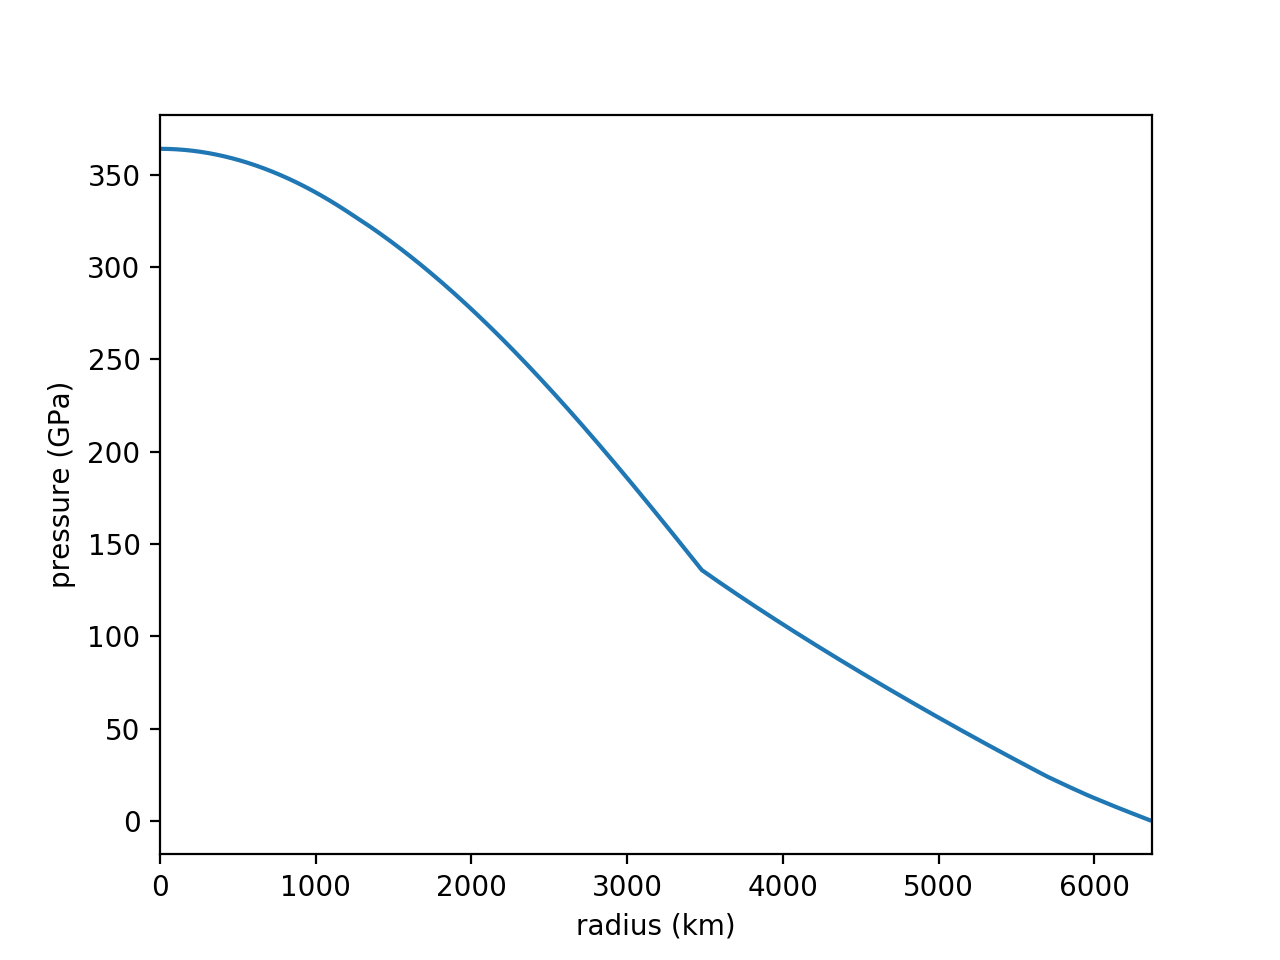

(0, 6371)

In [ ]:
# Let us first swap the arrays to be as a function of depth.
depth = 6371.e3-rad[::-1]
dens_with_z = dens[::-1]
g_with_z = g[::-1]

#### Implement integrations here
P = integrate.cumtrapz(g_with_z*dens_with_z, depth, initial = 0) 
print(np.round(np.max(P))) 
assert(np.round(np.max(P),3) == 364101176139.805)

plt.figure()
plt.plot(rad/1.e3,P[::-1]/1.e9)
plt.xlabel('radius (km)')
plt.ylabel('pressure (GPa)')
plt.xlim(0, 6371)

#### Deriving the equation for the moment of inertia of a two-layered Earth

First, lets derive the equation for the moment of intertia of a sphere: 
    <img src="https://github.com/sannecottaar/ESC_1B_ESB/blob/main/1D%20Earth/sphere.png?raw=1" style="width: 400px;">
    
    
The Moment of Intertia for an infinitesimal disc in this sphere is:
$ dI = 1/2r^2dm$

Where $dm = \pi\rho r^2dx$

So, $dI= 1/2\pi \rho r^4 dx$

In the sphere above, $x$, $r$, $R$ form a triangle, so from Pythagoras gives us a relation between $x$ and $r$: $r^2 = R^2-x^2$

Now we can substitute this and integrate over the sphere from -R to R:

$I = 1/2 \pi \rho \int_{-R}^{R}(R^2-x^2)^2 dx = 8/15 \pi \rho R^5$

Now for the mantle: $I_m = 8/15 \pi (\rho_m R^5 - \rho_m r_c^5)$

And for the core: $ I_c = 8/15 \pi \rho_c r_c^5$

So combined: $I  = \frac{8}{15} \pi [(R^5\rho_{m} + r_{c}^5 (\rho_{c}-\rho_{m})]$